In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [189]:
df = pd.read_csv("/content/Utilities.csv")

#Please Load the data as a Panda dataframe, set row names (index) to the utilities column (company). Convert all columns to float.

In [190]:
df.set_index('Company', inplace=True)

In [191]:
df = df.astype(float)

In [192]:
df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044
Florida,1.32,13.5,111.0,60.0,-2.2,11127.0,22.5,1.241
Hawaiian,1.22,12.2,175.0,67.6,2.2,7642.0,0.0,1.652
Idaho,1.10,9.2,245.0,57.0,3.3,13082.0,0.0,0.309
Kentucky,1.34,13.0,168.0,60.4,7.2,8406.0,0.0,0.862


#1)a. Use “from sklearn.metrics import pairwise” and calculate the pairwise Euclidean distance between each pair of Utilities and show the distance matrix.

In [193]:
# Calculating pairwise Euclidean distance between each pair of Utilities and show the distance matrix.
pairwise_euclidean_distance = pd.DataFrame()
company_1_list = []
company_2_list = []
euclidean_distance_list = []

for i in df.index:
    for j in df.index:
        if i != j:
            company_1_list.append(i)
            company_2_list.append(j)
            euclidean_distance_list.append(euclidean_distances([df.loc[i, :], df.loc[j, :]])[0][1])

pairwise_euclidean_distance['Company 1'] = company_1_list
pairwise_euclidean_distance['Company 2'] = company_2_list
pairwise_euclidean_distance['Euclidean Distance'] = euclidean_distance_list

print("\nPairwise Euclidean Distance Matrix:")
print(pairwise_euclidean_distance)


Pairwise Euclidean Distance Matrix:
    Company 1     Company 2  Euclidean Distance
0    Arizona        Boston          3989.408076
1    Arizona       Central           140.402855
2    Arizona   Commonwealth         2654.277632
3    Arizona             NY         5777.167672
4    Arizona       Florida          2050.529440
..        ...           ...                 ...
457  Virginia     San Diego         4379.211818
458  Virginia      Southern           59.325286
459  Virginia         Texas         3414.831455
460  Virginia     Wisconsin         2806.165712
461  Virginia        United         3443.240967

[462 rows x 3 columns]


In [194]:
Euclidean_distance_df = pd.DataFrame(euclidean_distances(df,df), columns=df.index, index=df.index)
Euclidean_distance_df

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


#b. Standardize the features based on mean and std and recalculate the pairwise distance matrix using Euclidean distance

In [195]:
# Standardizing the features based on mean and std and recalculate the pairwise distance matrix using Euclidean distance.
std_scaler = StandardScaler()
df_stdsc = pd.DataFrame(std_scaler.fit_transform(df), index=df.index, columns=df.columns)

In [196]:
df_stdsc

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073


In [197]:
recalibrated_euclidean_distance = pd.DataFrame()
company_1_list = []
company_2_list = []
euclidean_distance_list = []

for i in df.index:
    for j in df.index:
        if i != j:
            company_1_list.append(i)
            company_2_list.append(j)
            euclidean_distance_list.append(euclidean_distances([df_stdsc.loc[i, :], df_stdsc.loc[j, :]])[0][1])

recalibrated_euclidean_distance['Company 1'] = company_1_list
recalibrated_euclidean_distance['Company 2'] = company_2_list
recalibrated_euclidean_distance['Euclidean Distance (Standardized)'] = euclidean_distance_list

print("\nRecalibrated Pairwise Euclidean Distance Matrix:")
print(recalibrated_euclidean_distance)


Recalibrated Pairwise Euclidean Distance Matrix:
    Company 1     Company 2  Euclidean Distance (Standardized)
0    Arizona        Boston                            3.169015
1    Arizona       Central                            3.765812
2    Arizona   Commonwealth                           2.520090
3    Arizona             NY                           4.220157
4    Arizona       Florida                            3.691134
..        ...           ...                                ...
457  Virginia     San Diego                           3.713439
458  Virginia      Southern                           2.608022
459  Virginia         Texas                           4.060987
460  Virginia     Wisconsin                           2.679660
461  Virginia        United                           3.083151

[462 rows x 3 columns]


In [198]:
recalibrated_euclidean_distance

,Company 1,Company 2,Euclidean Distance (Standardized)
0,Arizona,Boston,3.169015
1,Arizona,Central,3.765812
2,Arizona,Commonwealth,2.520090
3,Arizona,NY,4.220157
4,Arizona,Florida,3.691134
...,...,...,...
457,Virginia,San Diego,3.713439
458,Virginia,Southern,2.608022
459,Virginia,Texas,4.060987
460,Virginia,Wisconsin,2.679660


In [199]:
Euclidean_distance_standard = pd.DataFrame(euclidean_distances(df_stdsc,df_stdsc), columns=df_stdsc.index, index=df_stdsc.index)
Euclidean_distance_standard

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3.169015,3.765812,2.520090,4.220157,3.691134,3.993720e+00,2.801825,3.330423,3.172047,...,4.052817,2.163226,2.654513,4.127959e+00,4.500146,1.921424,2.467158,3.249192,3.534675,2.568337
Boston,3.169015,0.000000,5.032163,2.215142,3.943517,4.318084,3.529495e+00,3.984125,4.050246,2.768993,...,3.515710,4.425576,2.560054,4.950880e+00,3.708860,2.972757,4.743949,3.068020,2.373011,2.478910
Central,3.765812,5.032163,0.000000,4.203729,4.573896,3.063188,4.317024e+00,5.108325,2.817399,4.027535,...,4.489187,2.806526,5.278335,5.388328e+00,6.506135,2.788056,3.254211,3.821128,5.207752,4.206024
Commonwealth,2.520090,2.215142,4.203729,0.000000,4.224495,3.277184,4.062776e+00,3.779854,3.841959,1.526524,...,2.637646,3.306082,3.265325,5.084136e+00,5.008841,2.713930,3.545692,1.859211,3.975667,2.639141
NY,4.220157,3.943517,4.573896,4.224495,0.000000,4.708438,4.704423e+00,5.276839,4.595559,4.140472,...,4.870028,4.932202,4.355388,5.953597e+00,5.761047,4.440238,5.254603,4.489063,3.729893,3.860516
Florida,3.691134,4.318084,3.063188,3.277184,4.708438,0.000000,3.431822e+00,5.029591,3.818610,3.919166,...,4.662098,3.550909,4.161442,5.979752e+00,6.242992,2.921102,2.641951,2.980937,4.737258,4.121700
Hawaiian,3.993720,3.529495,4.317024,4.062776,4.704423,3.431822,5.960464e-08,4.467217,2.862102,4.612562,...,5.128124,5.030610,2.999096,5.161106e+00,4.685009,3.018404,4.621687,3.625281,2.738363,4.094229
Idaho,2.801825,3.984125,5.108325,3.779854,5.276839,5.029591,4.467217e+00,0.000000,3.679419,3.760340,...,4.238047,4.437261,3.940469,2.253263e+00,5.554211,3.313593,4.204637,4.190632,4.070722,3.315605
Kentucky,3.330423,4.050246,2.817399,3.841959,4.595559,3.818610,2.862102e+00,3.679419,0.000000,3.656082,...,3.744745,3.906254,4.210410,3.712667e+00,5.016372,2.485683,4.205746,3.017396,3.830755,3.284446


#For the rest of the tasks, use the normalized version of the dataframe.

In [200]:
scalar = MinMaxScaler()
df_normal =  pd.DataFrame(scalar.fit_transform(df), index=df.index, columns=df.columns)
df_normal

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,0.418919,0.311111,0.352564,0.258427,0.333333,0.408528,0.000000,0.176536
Boston,0.189189,0.433333,0.679487,0.455056,0.385965,0.126441,0.503984,0.689541
Central,0.918919,1.000000,0.108974,0.179775,0.491228,0.418075,0.000000,0.414499
Commonwealth,0.364865,0.533333,0.461538,0.348315,0.219298,0.220847,0.683267,0.216381
NY,1.000000,0.266667,0.615385,0.078652,0.280702,0.000000,0.310757,0.960155
Florida,0.770270,0.788889,0.096154,0.573034,0.000000,0.553497,0.448207,0.515772
Hawaiian,0.635135,0.644444,0.506410,1.000000,0.385965,0.307050,0.000000,0.743221
Idaho,0.472973,0.311111,0.955128,0.404494,0.482456,0.691747,0.000000,0.000000
Kentucky,0.797297,0.733333,0.461538,0.595506,0.824561,0.361078,0.000000,0.306032


#2)a. Use “from scipy.cluster.hierarchy import linkage” and plot the Dendrogram using the Single linkage

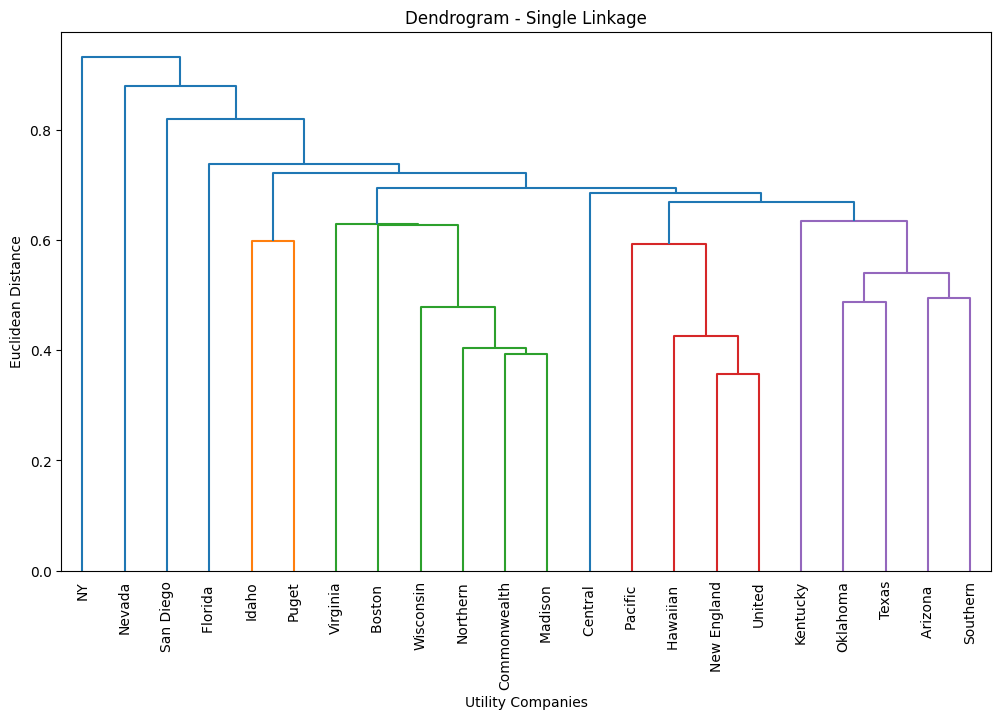

In [201]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

linkage_single = linkage(df_normal, method='single')
fig = plt.figure(figsize=(12, 7))
dendrogram(linkage_single, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Utility Companies')
plt.ylabel('Euclidean Distance')
plt.show()

#b. plot the Dendrogram using Average linkage

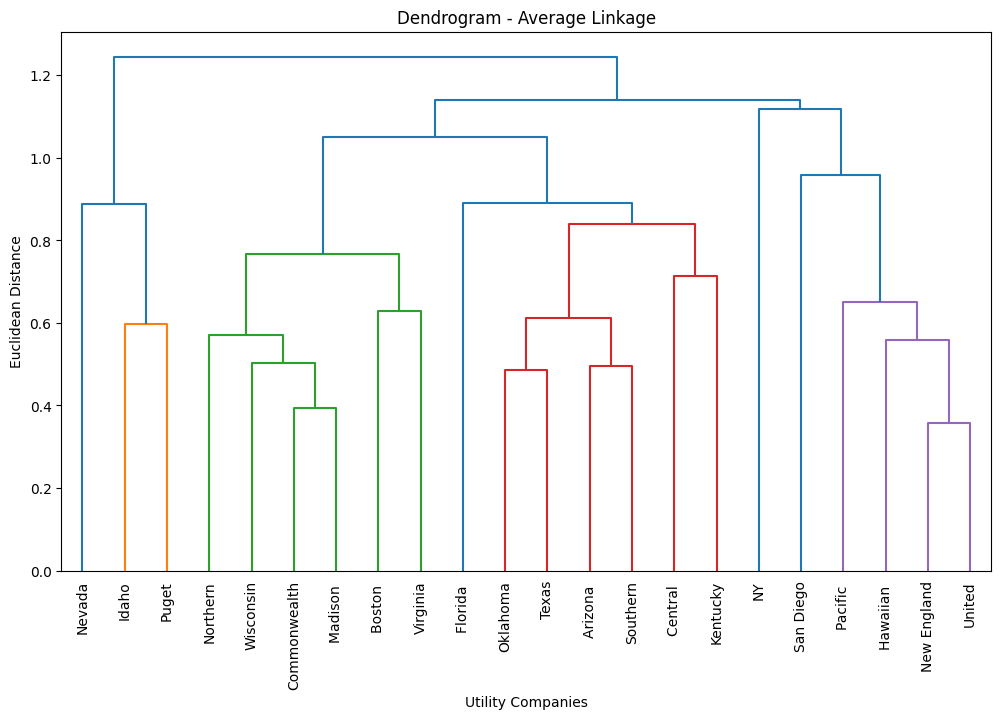

In [202]:
# Hierarchical clustering with Average linkage
linkage_average = linkage(df_normal, method='average')
plt.figure(figsize=(12, 7))
dendrogram(linkage_average, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Utility Companies')
plt.ylabel('Euclidean Distance')
plt.show()

#c. use “from scipy.cluster.hierarchy import fcluster” and apply it to Dendrograms for both Single and Average linkages to separate the data points into 6 clusters and print the clusters with their corresponding members. (Set the criterion='maxclust' for the fcluster)

In [203]:
from scipy.cluster.hierarchy import fcluster

sgl_fc = fcluster(linkage_single, t=6, criterion='maxclust')
df_normal['Single Link fcluster'] = sgl_fc

for i in range(1, np.max(sgl_fc)+1):
    cor_mbrs = df_normal.index[df_normal['Single Link fcluster'] == i].tolist()
    print(f'Cluster {i}: {cor_mbrs}')

Cluster 1: ['Idaho', 'Puget']
Cluster 2: ['Arizona ', 'Boston ', 'Central ', 'Commonwealth', 'Hawaiian ', 'Kentucky', 'Madison ', 'New England', 'Northern', 'Oklahoma', 'Pacific ', 'Southern', 'Texas', 'Wisconsin', 'United', 'Virginia']
Cluster 3: ['Florida ']
Cluster 4: ['San Diego']
Cluster 5: ['Nevada']
Cluster 6: ['NY']


In [204]:
avg_fc = fcluster(linkage_average, t=6, criterion='maxclust')
df_normal['Average Link fcluster'] = avg_fc

for i in range(1, np.max(avg_fc)+1):
    cor_mbrs = df_normal.index[df_normal['Average Link fcluster'] == i].tolist()
    print(f'Cluster {i}: {cor_mbrs}')


Cluster 1: ['Idaho', 'Nevada', 'Puget']
Cluster 2: ['Boston ', 'Commonwealth', 'Madison ', 'Northern', 'Wisconsin', 'Virginia']
Cluster 3: ['Arizona ', 'Central ', 'Florida ', 'Kentucky', 'Oklahoma', 'Southern', 'Texas']
Cluster 4: ['Hawaiian ', 'New England', 'Pacific ', 'United']
Cluster 5: ['San Diego']
Cluster 6: ['NY']


#3)a. Use “from sklearn.cluster import KMeans” to cluster the data into 6 clusters. Set the random state for KMeans to “0”. Print the clusters and their members.

In [205]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_normal.iloc[:,:-2])
kmeans_cluster = kmeans.labels_ + 1
df_normal['KMeans Clusters'] = kmeans_cluster

num_clusters = df_normal['KMeans Clusters'].nunique()

for i in range(1, num_clusters + 1):
    cor_mbrs = df_normal.index[df_normal['KMeans Clusters'] == i].tolist()
    print(f'Cluster {i}: {cor_mbrs}')


Cluster 1: ['Hawaiian ', 'New England', 'Pacific ', 'San Diego', 'United']
Cluster 2: ['Boston ', 'Commonwealth', 'Madison ', 'Northern', 'Wisconsin', 'Virginia']
Cluster 3: ['Idaho', 'Nevada', 'Puget']
Cluster 4: ['Arizona ', 'Florida ', 'Oklahoma', 'Southern', 'Texas']
Cluster 5: ['Central ', 'Kentucky']
Cluster 6: ['NY']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#b. For the number of clusters from 1-7, plot the average SSE vs the number of clusters as a line plot. Use “intertia” attribute of KMeans to get the SSE. Make sure that you divide it by the number of clusters to get the average SSE.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

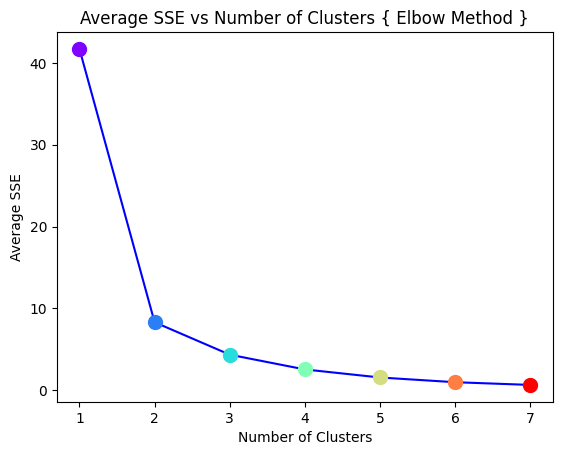

In [206]:
import matplotlib.cm as cm

max_clusters = 8
clusters = range(1, max_clusters)
SSE = []

for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_normal.iloc[:,:-2])
    SSE.append(kmeans.inertia_/k)


colors = cm.rainbow(np.linspace(0, 1, len(clusters)))

plt.plot(clusters, SSE, 'bx-')
for i, c in enumerate(colors):
    plt.plot(clusters[i], SSE[i], marker='o', markersize=10, color=c)
plt.xlabel('Number of Clusters')
plt.ylabel('Average SSE')
plt.title('Average SSE vs Number of Clusters { Elbow Method }')
plt.xticks(clusters)
plt.show()